# BENEFÍCIOS AO CIDADÃO
A seguinte tarefa consiste em:

1.0. planejar a tarefa de extração, tratamento e disponibilização dos dados de benefícios (calendário de entregas);

1.1. obter os dados mais recentes dos benefícios sociais disponíveis na página: http://www.transparencia.gov.br/download-de-dados em BENEFÍCIOS AO CIDADÃO;

1.2. tratar os dados obtidos para obter apenas o número de identificação dos beneficiários e os períodos em que os benefícios foram recebidos;

1.3. disponibilizar em um só arquivo (txt ou csv) tabela com beneficiários, benefícios e períodos de recebimento;

1.4. documentar processos de trabalho (obtenção, tratamento, disponibilização);

1.5. avaliar viabilidade da automação dos processos (com o supervisor);

2.1. automatizar a obtenção dos dados;

2.2. automatizar o tratamento de dados;

2.3. automatizar a disponibilização de dados;

2.4. documentar processos de trabalho (automatização da obtenção, tratamento, disponibilização);

2.4. avaliar atualização do processo (com o supervisor);

3.1 avaliar projeto (com o supervisor);

3.2. inclusão do projeto no processo de trabalho LAB;

## 1.0. planejar a tarefa de extração, tratamento e disponibilização dos dados de benefícios (calendário de entregas);
Para a etapa de extração é possível realizar a princípio por 3 (três) métodos.

### 1.0.1. Manualmente
Baixando os arquivos separadamente pelo site : `http://www.transparencia.gov.br/download-de-dados`.

### 1.0.2. Semimanual
Baixando os arquivos via url específica para cada Benefício, só informando o "ano" e "mês".
* **Auxílio Emergencial:** `https://www.portaltransparencia.gov.br/download-de-dados/auxilio-emergencial/202002`
* **Bolsa Família - Pagamentos:** `https://www.portaltransparencia.gov.br/download-de-dados/bolsa-familia-pagamentos/202101`
* **Bolsa Família - Saques:** `https://www.portaltransparencia.gov.br/download-de-dados/bolsa-familia-saques/202101`
* **Garantia-Safra:** `https://www.portaltransparencia.gov.br/download-de-dados/garantia-safra/202101`
* **Seguro defeso (Pescador Artesanal):** `https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202101`
* **Erradicação do Trabalho Infantil (PETI):** `https://www.portaltransparencia.gov.br/download-de-dados/peti/202101`
* **Benefício de Prestação Continuada (BPC):** `https://www.portaltransparencia.gov.br/download-de-dados/bpc/202101`

### 1.0.3. API
Acessando e baixando os arquivos via API, porém é necessário realizar um cadastro disponibilizando um e-mail para requisições via API: 
* `https://api.portaldatransparencia.gov.br/swagger-ui.html#/`
* `https://www.portaltransparencia.gov.br/api-de-dados`
* `https://portaldatransparencia.gov.br/api-de-dados/cadastrar-email`
* Exemplos de uso: `http://www.portaldatransparencia.gov.br/pagina-interna/603579-api-de-dados-exemplos-de-uso`

## 1.1. obter os dados mais recentes dos benefícios sociais disponíveis na página: `http://www.transparencia.gov.br/download-de-dados` em BENEFÍCIOS AO CIDADÃO;
* Colunas para utilizar: "NOME BENEFICIÁRIO", "CPF BENEFICIÁRIO", "NIS BENEFICIÁRIO".
* Criar coluna "BENEFÍCIO", ao qual no arquivo final contenham colunas referentes a cada benefício dos dados coletados e o valor de "0" ou "1", caso o beneficiário tenha ou não o benefício respectivo a coluna.

## Definição do intervalo de datas



##### Primeira opção de seleção do intervalo de datas

In [ ]:
# Função para retornar o intervalo de data para a coleta de dados.
def defineIntervalo(ano_inicio, ano_fim, mes_inicio, mes_fim):
  anos = [str(i) for i in range(ano_inicio, ano_fim+1)] # Cria uma lista com o ano do intervalo, por exemplo de 2010 a 2015, ou seja, 2010, 2011, 2012, 2013, 2014, 2015.
  meses = [str(i).zfill(2) for i in range(mes_inicio, mes_fim+1)] # Cria uma lista com os meses do ano, de 01 a 12, ou seja Janeiro a Dezembro.
  return anos, meses

In [ ]:
# Nestas variáveis seleciona-se o intervalo de coleta de dados, baseados em pelo ano e mes de inicio e fim.
ano_inicio = 2020
ano_fim = 2021
mes_inicio = 1
mes_fim = 12
anos, meses = defineIntervalo(ano_inicio, ano_fim, mes_inicio, mes_fim)

In [ ]:
anos

['2020', '2021']

In [ ]:
meses

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [ ]:
for ano in anos:
  for mes in meses:
    print(f"{ano}{mes}")

2020/01
2020/02
2020/03
2020/04
2020/05
2020/06
2020/07
2020/08
2020/09
2020/10
2020/11
2020/12
2021/01
2021/02
2021/03
2021/04
2021/05
2021/06
2021/07
2021/08
2021/09
2021/10
2021/11
2021/12


##### Segunda opção de seleção do intervalo de datas

In [ ]:
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

## Referências: 
# https://medium.com/data-hackers/como-manipular-datetime-no-python-578f07b72920
# https://docs.python.org/3/library/datetime.html

In [ ]:
def intervaloDatas():
  start_date = date(2018, 1 ,1)
  end_date = date(2019, 12, 31)

  delta = relativedelta(months=+1)
  datas = []
  anos = []
  mes = []
  while start_date <= end_date:
      dia = '{}'.format(start_date.strftime("%Y-%m-%d"))
      datas.append(dia)
      start_date += delta
      for data in datas:
          anos.append(data[0:4])
          anos_1 = sorted(list(set(anos)))
          meses.append(data[5:7])
          meses_1 = sorted(list(set(meses)))
  return anos_1, meses_1

In [ ]:
anos_2, meses_2 = intervaloDatas()

In [ ]:
for ano_2 in anos_2:
  for mes_2 in meses_2:
    print(f"{ano_2}{mes_2}")

## Coleta de dados

In [1]:
# Abrindo conexão com o Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importação de Bibliotecas
import time
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import requests
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import ssl
#from requests.packages.urllib3.exceptions import InsecureRequestWarning

#requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
#ssl._create_default_https_context = ssl._create_unverified_context

### 2.1. automatizar a obtenção dos dados;
#### `geração do caminho para pasta` e de `geração de url`.

### Referências 
* [Baixando e descompactando um arquivo Zip](https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/)
* [Python’s Requests Library (Guide)](https://realpython.com/python-requests/)

### Problemas encontrados e solução
* [Suppress InsecureRequestWarning: Unverified HTTPS request is being made in Python2.6](https://stackoverflow.com/questions/27981545/suppress-insecurerequestwarning-unverified-https-request-is-being-made-in-pytho)
* [http.client.IncompleteRead error in Python3](https://stackoverflow.com/questions/51226635/http-client-incompleteread-error-in-python3)
* [Scraping: SSL: CERTIFICATE_VERIFY_FAILED error for ...](https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org)

In [ ]:
# Função para o menu de escolha do benefício para coleta.
def menuBeneficio():
  # Menu para escolha do benefício.
  print("1 - Auxílio emergencial")
  print("2 - Bolsa Família - Pagamentos")
  print("3 - Bolsa Família - Saques")
  print("4 - Garantia Safra")
  print("5 - Seguro Defeso (Pescador Artesanal)")
  print("6 - Erradicação do Trabalho Infantil (PETI)")
  print("7 - Benefício de Prestação Continuada (BPC)")

  while True:
    try:
      opt = int(input("Digite a opção desejada: "))
      if opt == 1:
        print("1 - Auxílio emergencial")
        beneficio = "auxilio-emergencial"
        pasta_salvar = caminho_padrao+beneficio
        break
      elif opt == 2:
        print("2 - Bolsa Família - Pagamentos")
        beneficio = "bolsa-familia-pagamentos"
        pasta_salvar = caminho_padrao+beneficio
        break
      elif opt == 3:
        print("3 - Bolsa Família - Saques")
        beneficio = "bolsa-familia-saques"
        pasta_salvar = caminho_padrao+beneficio
        break
      elif opt == 4:
        print("4 - Garantia Safra")
        beneficio = "garantia-safra"
        pasta_salvar = caminho_padrao+beneficio
        break
      elif opt == 5:
        print("5 - Seguro Defeso (Pescador Artesanal)")
        beneficio = "seguro-defeso"
        pasta_salvar = caminho_padrao+beneficio
        break
      elif opt == 6:
        print("6 - Erradicação do Trabalho Infantil (PETI)")
        beneficio = "peti"
        pasta_salvar = caminho_padrao+beneficio
        break
      elif opt == 7:
        print("7 - Benefício de Prestação Continuada (BPC)")
        beneficio = "bpc"
        pasta_salvar = caminho_padrao+beneficio
        break
    except ValueError as V:
      print(V)
      print(V)
      print("Valor digitado incorreto apenas numeros inteiros:")
      pass
    except Exception as E:
      print(E)
      print(E)
  return beneficio, pasta_salvar


# Função para retornar o intervalo de data para a coleta de dados.
def defineIntervalo(ano_inicio, ano_fim, mes_inicio, mes_fim):
  anos = [str(i) for i in range(ano_inicio, ano_fim+1)] # Cria uma lista com o ano do intervalo, por exemplo de 2010 a 2015, ou seja, 2010, 2011, 2012, 2013, 2014, 2015.
  meses = [str(i).zfill(2) for i in range(mes_inicio, mes_fim+1)] # Cria uma lista com os meses do ano, de 01 a 12, ou seja Janeiro a Dezembro.
  return anos, meses

# Função para geração de url (link do site) para a extração dos dados.
def GeraURL(nome_pasta, beneficio, ano, mes):
  # Geração de url.
  print("Salvando em: {}".format(nome_pasta))
  url = url_padrao.format(beneficio, ano, mes)
  print(f"Acessando: {url}")
  return url

def extrairDados(url, nome_pasta):
  # Acessando o servidor/url.
  resposta = requests.get(url, verify=False, stream = True)
  # Verificando se obteve acesso.
  if int(resposta.status_code) == 200:
      print(f"Acessado!!! Resposta: {resposta.status_code}")
      # Lendo e extraindo o arquivo zip para a pasta definida.
      with ZipFile(BytesIO(resposta.content)) as zfile:
        zfile.extractall(nome_pasta)
  else:
      print(f"Erro!!! Resposta: {resposta.status_code}")

In [ ]:
# Variáveis globais.
# Nestas variáveis seleciona-se o intervalo de coleta de dados, baseados em pelo ano e mes de inicio e fim.
ano_inicio = 2021
ano_fim = 2021
mes_inicio = 1
mes_fim = 12

# Caminho padrão para salvar os dados.
caminho_padrao = "/content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/" # Definir caminho da pasta para salvar os dados coletados.

# URL padrão para requisição do arquivo para o benefício.
url_padrao = "https://www.portaltransparencia.gov.br/download-de-dados/{}/{}{}"

In [ ]:
beneficio_selecionado, nome_pasta = menuBeneficio()

print(f"-----> Benefício: {beneficio_selecionado} <-----")
# Espera de 1s para acessar outra url.
time.sleep(1)

anos, meses = defineIntervalo(ano_inicio, ano_fim, mes_inicio, mes_fim)
for ano in anos:
    for mes in meses:
      print(f"Ano e Mês: {ano}{mes}")
      # Espera de 1s para acessar outra url.
      time.sleep(1)

      site = GeraURL(nome_pasta, beneficio_selecionado, ano, mes)
      # Espera de 1s para acessar outra url.
      time.sleep(1)
      #print(site)

      # Espera de 1s para acessar outra url.
      time.sleep(1)
      dados = extrairDados(site, nome_pasta)
      print()

      # Espera de 5s para acessar outra url.
      time.sleep(5)

1 - Auxílio emergencial
2 - Bolsa Família - Pagamentos
3 - Bolsa Família - Saques
4 - Garantia Safra
5 - Seguro Defeso (Pescador Artesanal)
6 - Erradicação do Trabalho Infantil (PETI)
7 - Benefício de Prestação Continuada (BPC)
Digite a opção desejada: 5
5 - Seguro Defeso (Pescador Artesanal)
-----> Benefício: seguro-defeso <-----
Ano e Mês: 202101
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202101


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202102
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202102


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202103
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202103


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202104
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202104


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202105
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202105


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202106
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202106


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Erro!!! Resposta: 404

Ano e Mês: 202107
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202107


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202108
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202108


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Acessado!!! Resposta: 200

Ano e Mês: 202109
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202109


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Erro!!! Resposta: 404

Ano e Mês: 202110
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202110


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Erro!!! Resposta: 404

Ano e Mês: 202111
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202111


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Erro!!! Resposta: 404

Ano e Mês: 202112
Salvando em: /content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/seguro-defeso
Acessando: https://www.portaltransparencia.gov.br/download-de-dados/seguro-defeso/202112


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Erro!!! Resposta: 404



### Abrindo arquivos

In [ ]:
# Abre arquivo.
df = pd.read_csv("/content/drive/MyDrive/Projetos_Tassio_Sales/beneficios_ao_cidadao-12-2021/dados_brutos/peti/202101_PETI.csv", sep=";", encoding="latin-1", dtype=str)
df.head()

,MÊS REFERÊNCIA,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,NIS FAVORECIDO,NOME FAVORECIDO,SITUAÇÃO BENEFÍCIO,VALOR PARCELA
0,202101,AL,2745,CORURIPE,23625254189,MARIA ROSANIA DOS SANTOS,Não Sacado,"25,00"
1,202101,AL,2643,ESTRELA DE ALAGOAS,16434090421,MARIA ISABEL LEONIDIO DA SILVA SANTOS,Cancelado,"25,00"
2,202101,BA,3335,ANTONIO GONCALVES,16032693881,ANACLECIA SANTOS DA SILVA,Não Sacado,"25,00"
3,202101,BA,3335,ANTONIO GONCALVES,19046680641,JOSEMARA GARCIA DA SILVA,Cancelado,"25,00"
4,202101,BA,3335,ANTONIO GONCALVES,20958366289,JUSSARA NUNES DA SILVA,Não Sacado,"25,00"


# Descrição da atividade (Relatório)
Este notebook tem por objetivo realizar a extração dos arquivos de benefícios ao cidadão, contidos no site do portal da transparência `http://www.transparencia.gov.br/download-de-dados`. Neste site, encontra-se benefícios de `"auxilio-emergencial", "bolsa-familia-pagamentos", "bolsa-familia-saques", "garantia-safra", "seguro-defeso", "peti", "bpc"`, onde estes são disponibilizados por meio de filtros de **Ano** e **Mês**, sendo cada arquivo selecionado pelos filtrados serem do tipo `.zip` sendo necessário a extração do arquivo para obtenção dos dados do tipo `.csv`.

O script acima, foi desenvolvido com o objetivo de realizar-se a extração destes arquivos de uma forma `semi-automática`, ou seja, apenas o usuário inserindo as informações de `Ano` e `Mês` que deseja, e o `benefício` para download solicitado pela função do Menu, e assim o script realiza a extração dos dados contidos em cada link do site.

No decorrer do desenvolvimento, identificou-se a necessidade de inserção de opções complementares ao script, pois o site para a realizar a coleta dos dados, possui segurança de informação pela tentativa de robôs extrairem as informações, então foi necessário colocar as opções: `requests.packages.urllib3.disable_warnings(InsecureRequestWarning)` e `ssl._create_default_https_context = ssl._create_unverified_context`.

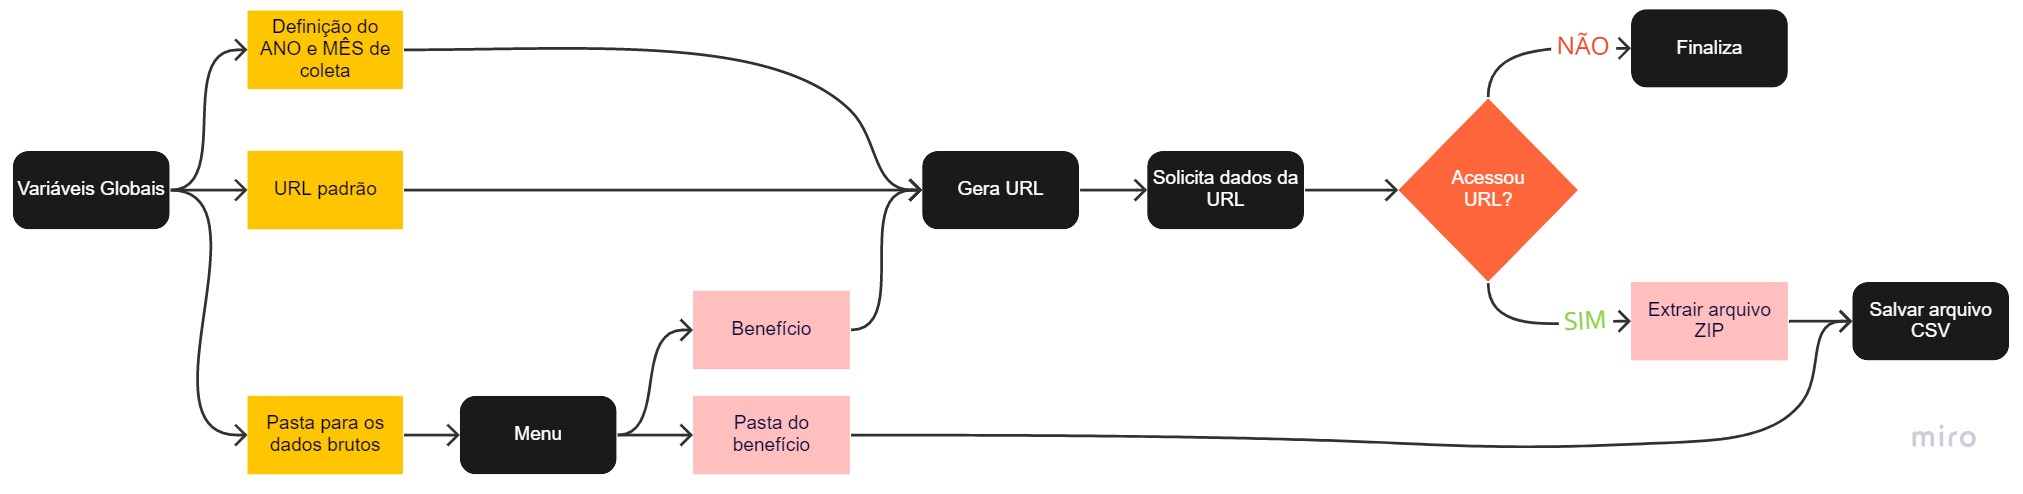